In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
# sudo apt-get install texlive-latex-base texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
fontsize=25


In [65]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/Graph Clustering Framework  - runtime_all.csv")
df = df[df["Round"] != 0] # remove first round
df = df.dropna(how='all')
df['Config'].fillna('none', inplace=True)

# df['Config'] = df['Config'].str.replace(",match_real_tectonic: false", "", regex=False)
# df = df[df["Config"] != "threshold: 10"]
# df = df[df['Input Graph'].isin([graph_name])]
# print(df.head())

# Average over rounds
df = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()

In [66]:
# print(df.to_csv())
# df

In [67]:
wcc_data = df[df["Clusterer Name"].isin(["ConnectivityClusterer", "SnapConnectivity", "NetworKitConnectivity", "TigerGraphWCC", "Neo4jConnectivity"])]
kcore_data = df[df["Clusterer Name"].isin(["KCoreClusterer", "SnapKCore", "NetworKitKCore", "TigerGraphKCore", "Neo4jKCore"])]
tectonic_data = df[df["Clusterer Name"].isin(["TectonicClusterer", "Tectonic"])]

In [68]:
def common_ax_style(ax):
    ax.set_xticks([1, 4, 8, 16, 30, 60])
    ax.set_xticklabels([1, 4, 8, 16, 30, "30h"])
    
    ax.set_yscale('log')
    # plt.yticks([0.03, 0.1, 0.3, 1])
    # ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    for l in ax.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in ax.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
        
    ax.set_xlabel("Threads", fontsize = fontsize)

def plot_data(df, ax):
    sns.lineplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", linewidth = 3, ax = ax)
    sns.scatterplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", s = 30, ax = ax, legend=False)


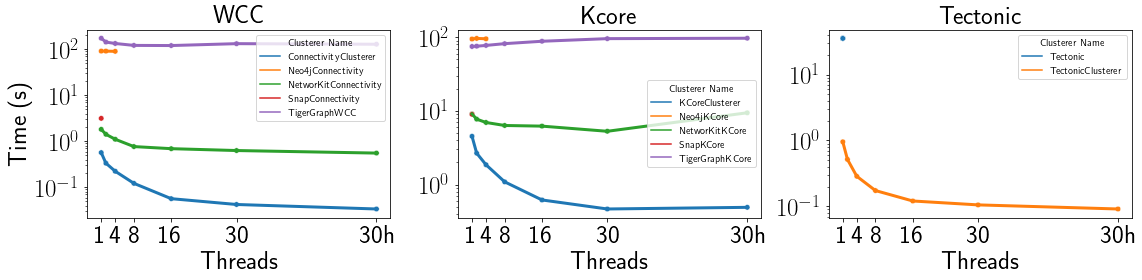

In [74]:
fig, axs = plt.subplots(1, 3, constrained_layout=False, figsize =(16,4))#, gridspec_kw=gs_kw)
ax = axs[0]
plot_data(wcc_data, ax)
common_ax_style(ax)
ax.set_title("WCC", fontsize=fontsize)
ax.set_ylabel("Time (s)", fontsize = fontsize)

ax = axs[1]
plot_data(kcore_data, ax)
common_ax_style(ax)
ax.set_title("Kcore", fontsize=fontsize)
ax.set_ylabel("")

ax = axs[2]
plot_data(tectonic_data, ax)
common_ax_style(ax)
ax.set_title("Tectonic", fontsize=fontsize)
ax.set_ylabel("")

plt.tight_layout()
plt.savefig("runtime.pdf")

In [59]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/Graph Clustering Framework  - runtime_all.csv")

print(df[df["Config"]=="threshold: 0.06,match_real_tectonic: false"].to_csv())

,Unnamed: 0,Clusterer Name,Input Graph,Threads,Config,Round,Cluster Time
247,400.0,TectonicClusterer,com-youtube.ungraph.txt,1.0,"threshold: 0.06,match_real_tectonic: false",0.0,0.964353
248,401.0,TectonicClusterer,com-youtube.ungraph.txt,1.0,"threshold: 0.06,match_real_tectonic: false",1.0,0.952634
249,402.0,TectonicClusterer,com-youtube.ungraph.txt,1.0,"threshold: 0.06,match_real_tectonic: false",2.0,0.958356
250,403.0,TectonicClusterer,com-youtube.ungraph.txt,1.0,"threshold: 0.06,match_real_tectonic: false",3.0,0.956095
275,428.0,TectonicClusterer,com-youtube.ungraph.txt,2.0,"threshold: 0.06,match_real_tectonic: false",0.0,0.514169
276,429.0,TectonicClusterer,com-youtube.ungraph.txt,2.0,"threshold: 0.06,match_real_tectonic: false",1.0,0.517732
277,430.0,TectonicClusterer,com-youtube.ungraph.txt,2.0,"threshold: 0.06,match_real_tectonic: false",2.0,0.516654
278,431.0,TectonicClusterer,com-youtube.ungraph.txt,2.0,"threshold: 0.06,match_real_tectonic: false",3.0,0.515077
303,456.0,Tecto